In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import cv2 as cv
import os
from sklearn.cluster import KMeans

In [3]:
train_path = "D://Shaina Mehta//Minor Project//Dataset//train//"
test_path = "D://Shaina Mehta//Minor Project//Dataset//test//"

## Lets Collect The Training Data

In [4]:
grades = ['grade_0','grade_1','grade_2','grade_3','grade_4']
finalListTrain = []
finalTrainLabels = []
for i in range(len(grades)):
    dir_join = train_path+grades[i]
    for file in os.listdir(dir_join):
        finalListTrain.append(dir_join+'//'+file)
        finalTrainLabels.append(i)
#dir_join = train_path+grades[0]  
#l = os.listdir(os.path.join(dir_join))
#l

## Similarly, we can collect the test data

In [5]:
finalListTest = []
finalTestLabels = []
for i in range(len(grades)):
    dir_join = test_path+grades[i]
    for file in os.listdir(dir_join):
        finalListTest.append(dir_join+'//'+file)
        finalTestLabels.append(i)

## Lets create pandas dataframe for both training and test data

In [6]:
train_dat = {'path':finalListTrain,'label':finalTrainLabels}
test_dat = {'path':finalListTest,'label':finalTestLabels}

In [7]:
train_data = pd.DataFrame.from_dict(train_dat)
train_data.head()

,path,label
0,D://Shaina Mehta//Minor Project//Dataset//trai...,0
1,D://Shaina Mehta//Minor Project//Dataset//trai...,0
2,D://Shaina Mehta//Minor Project//Dataset//trai...,0
3,D://Shaina Mehta//Minor Project//Dataset//trai...,0
4,D://Shaina Mehta//Minor Project//Dataset//trai...,0


In [8]:
test_data = pd.DataFrame.from_dict(test_dat)
test_data.head()

,path,label
0,D://Shaina Mehta//Minor Project//Dataset//test...,0
1,D://Shaina Mehta//Minor Project//Dataset//test...,0
2,D://Shaina Mehta//Minor Project//Dataset//test...,0
3,D://Shaina Mehta//Minor Project//Dataset//test...,0
4,D://Shaina Mehta//Minor Project//Dataset//test...,0


## Time for Data Analysis

In [9]:
type(train_data)

pandas.core.frame.DataFrame

In [10]:
train_data.count()

path     6604
label    6604
dtype: int64

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6604 entries, 0 to 6603
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    6604 non-null   object
 1   label   6604 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 103.3+ KB


In [12]:
train_data.shape

(6604, 2)

In [13]:
test_data.count()

path     1656
label    1656
dtype: int64

In [14]:
test_data.shape

(1656, 2)

In [15]:
df = pd.DataFrame()
df['ostheoarthritis grading'] = ['Grade 0','Grade 1','Grade 2','Grade 3','Grade 4']
grade_count = []
for i in range(5):
    gc = len(train_data[train_data['label']==i]) + len(test_data[test_data['label']==i])
    grade_count.append(gc)
df['count (both training and testing)'] = grade_count[:]
df

,ostheoarthritis grading,count (both training and testing)
0,Grade 0,3253
1,Grade 1,1495
2,Grade 2,2175
3,Grade 3,1086
4,Grade 4,251


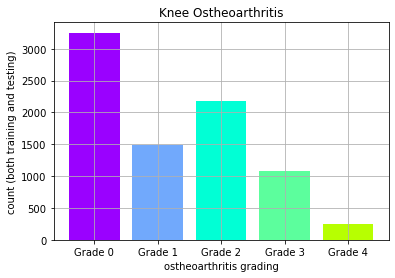

In [16]:
x = list(np.arange(5))
y = list(df['count (both training and testing)'])
plt.bar(x,y,color=['#9a01ff','#71a9fc','#01ffd5','#5cfe9d','#b7ff01'])
plt.grid()
plt.xticks(x,list(df['ostheoarthritis grading']))
plt.xlabel('ostheoarthritis grading')
plt.ylabel('count (both training and testing)')
plt.title('Knee Ostheoarthritis')
plt.show()

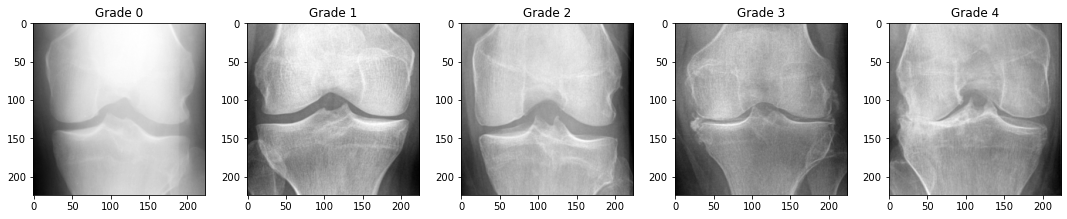

In [17]:
fig, ax = plt.subplots(1,5,figsize=(15,15))
ax = ax.ravel()
plt.tight_layout()
ax = ax.ravel()
plt.tight_layout()
ldata = ['D://Shaina Mehta//Minor Project//Dataset//train//grade_0//9005656L.png',
         'D://Shaina Mehta//Minor Project//Dataset//train//grade_1//9008561R.png',
        'D://Shaina Mehta//Minor Project//Dataset//train//grade_2//9024940L.png',
        'D://Shaina Mehta//Minor Project//Dataset//train//grade_3//9037823L.png',
        'D://Shaina Mehta//Minor Project//Dataset//train//grade_4//9204055R.png']
lab = ['Grade 0','Grade 1','Grade 2','Grade 3','Grade 4']
for i in range(0,5):
    ax[i].imshow(plt.imread(ldata[i]), cmap='gray')
    ax[i].set_title(lab[i])
plt.show()

## Lets Perform Image Segmentation on training and test images using K-Means Clustering and Cresating Training and Test Data


In [18]:
train_temp_path = "D://Shaina Mehta//Minor Project//Temp//train//"
test_temp_path = "D://Shaina Mehta//Minor Project//Temp//test//"

In [19]:
temp_train=[]
temp_test=[]
for i in range(len(grades)):
    os.makedirs(train_temp_path+grades[i]+'//')
    temp_train.append(train_temp_path+grades[i]+'//')
    os.makedirs(test_temp_path+grades[i]+'//')
    temp_test.append(test_temp_path+grades[i]+'//')

In [20]:
def segmentation(image):
    pixelValues = image.reshape(-1,1)
    pixelValues = np.float32(pixelValues)
    kmeans = KMeans(n_clusters=10)
    kmeans.fit(pixelValues)
    centers = np.uint8(kmeans.cluster_centers_)
    labels = kmeans.labels_
    newImage = np.zeros(pixelValues.shape)
    for ix in range(newImage.shape[0]):
        newImage[ix] = centers[labels[ix]]
    newImage = newImage.reshape((image.shape))
    return newImage

In [21]:
tempListTrain = []
tempTrainLabels = []
for i in range(len(grades)):
    dir_join = train_path+grades[i]
    for file in os.listdir(dir_join):
        tempListTrain.append(temp_train[i]+file)
        tempTrainLabels.append(i)

In [22]:
tempListTest = []
tempTestLabels = []
for i in range(len(grades)):
    dir_join = test_path+grades[i]
    for file in os.listdir(dir_join):
        tempListTest.append(temp_test[i]+file)
        tempTestLabels.append(i)

In [23]:
def imageProcessing(path,newPath):
    image = cv.imread(path,0)
    image = cv.GaussianBlur(image,(9,9),13,13)
    image = cv.resize(image,(128,128))
    seg_img = segmentation(image)
    cv.imwrite(newPath,seg_img)

In [24]:
temp_train_dat = {'path':tempListTrain,'label':tempTrainLabels}
temp_test_dat = {'path':tempListTest,'label':tempTestLabels}

In [25]:
temp_train_data = pd.DataFrame.from_dict(temp_train_dat)
temp_train_data.head()

,path,label
0,D://Shaina Mehta//Minor Project//Temp//train//...,0
1,D://Shaina Mehta//Minor Project//Temp//train//...,0
2,D://Shaina Mehta//Minor Project//Temp//train//...,0
3,D://Shaina Mehta//Minor Project//Temp//train//...,0
4,D://Shaina Mehta//Minor Project//Temp//train//...,0


In [26]:
temp_test_data = pd.DataFrame.from_dict(temp_test_dat)
temp_test_data.head()

,path,label
0,D://Shaina Mehta//Minor Project//Temp//test//g...,0
1,D://Shaina Mehta//Minor Project//Temp//test//g...,0
2,D://Shaina Mehta//Minor Project//Temp//test//g...,0
3,D://Shaina Mehta//Minor Project//Temp//test//g...,0
4,D://Shaina Mehta//Minor Project//Temp//test//g...,0


In [27]:
#training
for i in range(len(tempListTrain)):
    imageProcessing(finalListTrain[i],tempListTrain[i])
    print(i)
print('Success')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

KeyboardInterrupt: 

In [ ]:
#testing
for i in range(len(tempListTest)):
    imageProcessing(finalListTest[i],tempListTest[i])
    print(i)
print('Success')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
import torch
import torchvision
from torchvision import datasets, transforms
transform = transforms.Compose([  
      transforms.ToPILImage(),# Here we do not make data augmentations
        transforms.ToTensor()
    ])

In [ ]:
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as da
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from skimage import io
class ImageDataset(Dataset):
    def __init__(self,d,transform=None):
        self.annotations = d
        self.transform = transform
    def __len__(self):
        return len(self.annotations)
    def __getitem__(self,index):
        image = io.imread(os.path.join(self.annotations.iloc[index, 0]))
        label = torch.tensor(int(self.annotations.iloc[index, 1]))
        if self.transform:
            image = self.transform(image)
        image = torch.reshape(image, (1,128,128))
        return (image, label)

In [ ]:
train_set = ImageDataset(d=temp_train_data, transform=transform)
test_set = ImageDataset(d=temp_test_data, transform=transform)

In [ ]:
batch_size= 10
train_dl = DataLoader(train_set,batch_size=batch_size)
test_dl = DataLoader(test_set,batch_size=batch_size)

In [ ]:
import torch.nn as nn
input_size = 128*128  #Size of image
num_classes = 5  #the image number are in range 0-10
class LogisticRegression(nn.Module):
  def __init__(self,input_size,num_classes):
    super(LogisticRegression,self).__init__()
    self.linear = nn.Linear(input_size,num_classes)
  def forward(self,x):
    output = self.linear(x)
    return output

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

In [ ]:
model = LogisticRegression(input_size,num_classes).to(device)
epochs = 10
learning_rate = 0.05
loss_fn = nn.CrossEntropyLoss()
optimize = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
run = 0
accuracy_score = 0
for epoch in range(epochs):
  print('============================Epoch'+str(epoch+1)+'==============================')
  for i, (images,labels) in enumerate(train_dl):
    #print('----------------------Iteration'+str(i+1)+'------------------------')
    #labels = labels.unsqueeze(1)
    images = torch.autograd.Variable(images.view(-1,input_size)).to(device)
    labels = torch.autograd.Variable(labels).to(device)
    # nullify gradients w.r.t. parameters
    optimize.zero_grad()
    #forward propagation
    output = model(images)
    # compute loss based on obtained value and actual label
    #print(output.shape)
    #print(labels.shape)
    compute_loss = loss_fn(output,labels)
    # backward propagation
    compute_loss.backward()
    # update the parameters
    optimize.step()
    run+=1
    if ((i+1)%50 == 0):
      # check total accuracy of predicted value and actual label
      accurate = 0
      total = 0
      for images,labels in test_dl:
        images = torch.autograd.Variable(images.view(-1,input_size)).to(device)
        output = model(images)
        _,predicted = torch.max(output.data, 1)
        # total labels
        total+= labels.size(0)
        # Total correct predictions
        if torch.cuda.is_available():
          accurate += (predicted.cpu() == labels.cpu()).sum()
        else:
          accurate += (predicted == labels).sum()
        accuracy_score = 100 * accurate/total
        print('Iteration: {}. Loss: {}. Accuracy: {}'.format(run, compute_loss.item(), accuracy_score))

In [ ]:
correct = 0
total = 0
iter_test = 0
label = []
predicted_labels=[]
for images, labels in test_dl:
    iter_test += 1
    label.append(labels)
    images = images.view(-1,128*128).requires_grad_().to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    predicted_labels.append(predicted)
    # Total number of labels
    total += labels.size(0)
    # Total correct predictions
    if torch.cuda.is_available():
      correct += (predicted.cpu() == labels.cpu()).sum()
    else:
      correct += (predicted == labels).sum()
accuracy = 100 * (correct.item() / total)
print(accuracy)

## Lets create the training data

## Lets work out for test images

## Using Logistic Regression Algorithm For Detection and Severity Prediction